# Buy and Hold

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [10]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
import webbrowser as web

In [3]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import ATR
from util.SMA import SMA
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
from BuyAndHold import BuyAndHold



## Get Data

In [4]:
XAUUSD = load_data()

In [5]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

In [6]:
account_size = 20000

In [7]:
strategy = BuyAndHold

# Backtest each time frame

## TF D1

In [8]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/2000, )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                   99.960341
Equity Final [$]                    21225.069
Equity Peak [$]                     21430.149
Return [%]                           6.125345
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    0.297518
Volatility (Ann.) [%]                1.001867
Sharpe Ratio                         0.296964
Sortino Ratio                        0.406346
Calmar Ratio                         0.073904
Max. Drawdown [%]                    -4.02575
Avg. Drawdown [%]                   -0.202405
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       79 days 00:00:00
# Trades                                 5041
Win Rate [%]                        53.362428
Best Trade [%]                      10.973351
Worst Trade [%]                     -9.290183
Avg. Trade [%]                    

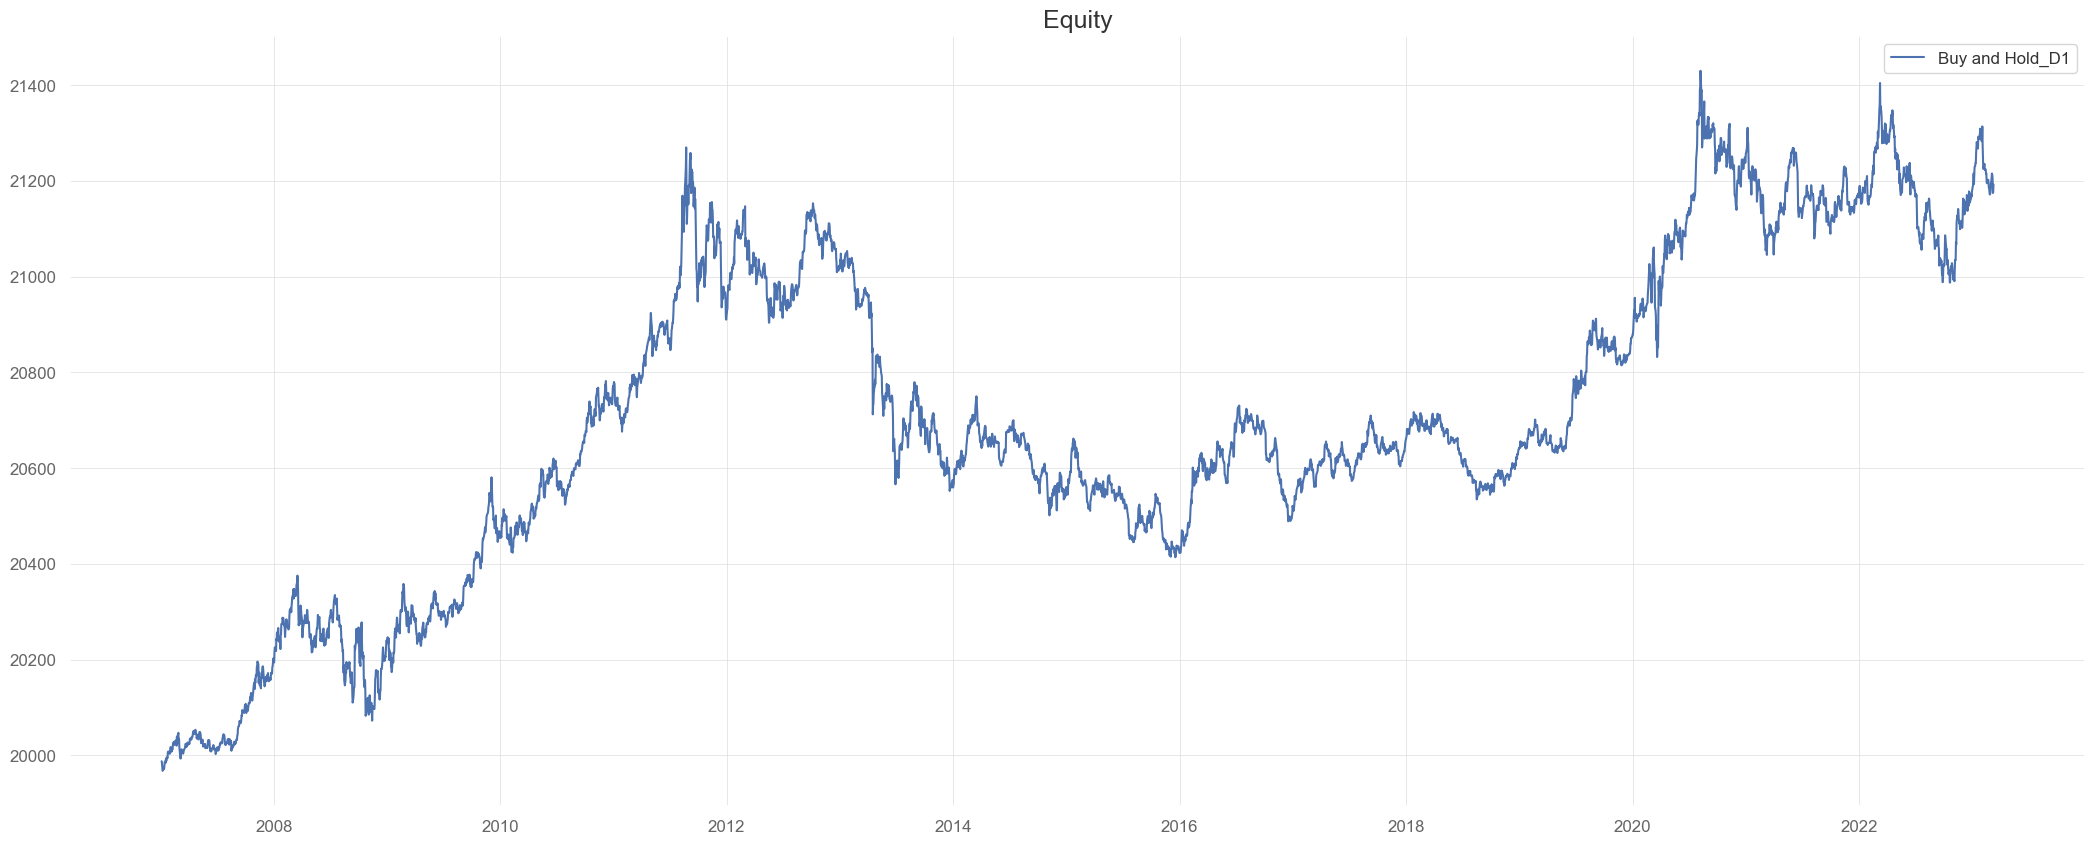

In [9]:
plot_equity_trades(result_D1['_trades'],'Buy and Hold_D1' , account_size)

In [17]:
XAUUSD['D1']

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01,635.679,637.103,635.006,635.943,604
2007-01-02,635.791,640.802,635.286,639.143,1282
2007-01-03,639.029,644.663,624.634,626.602,1302
2007-01-04,626.699,630.352,619.600,622.533,1365
2007-01-05,622.268,625.768,601.591,606.841,1284
...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379


In [26]:
result_D1['_equity_curve']

,Equity,DrawdownPct,DrawdownDuration
Time,,,
2007-01-01,20000.000,0.000000,NaT
2007-01-02,20000.000,0.000000,NaT
2007-01-03,19987.573,0.000621,NaT
2007-01-04,19983.504,0.000825,NaT
2007-01-05,19967.812,0.001609,NaT
...,...,...,...
2023-03-06,21207.226,0.010402,NaT
2023-03-07,21174.836,0.011914,NaT
2023-03-08,21176.146,0.011853,NaT


                           Strategy
-------------------------  ----------
Start Period               2007-01-01
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          6.13%
CAGR﹪                     0.25%

Sharpe                     0.3
Prob. Sharpe Ratio         91.03%
Smart Sharpe               0.3
Sortino                    0.41
Smart Sortino              0.41
Sortino/√2                 0.29
Smart Sortino/√2           0.29
Omega                      1.06

Max Drawdown               -4.03%
Longest DD Days            3259
Volatility (ann.)          1.0%
Calmar                     0.06
Skew                       -0.75
Kurtosis                   8.68

Expected Daily %           0.0%
Expected Monthly %         0.03%
Expected Yearly %          0.35%
Kelly Criterion            2.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.1%
Expected Shortfall (cVaR)  -0.1%

Max Consecutive Wins       11
Max 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2011-08-23,2015-12-17,2020-07-24,3259,-4.025750,-3.928468
2,2020-08-07,2022-10-20,2023-03-10,946,-2.064148,-1.985800
3,2008-03-17,2008-11-12,2009-09-15,548,-1.485899,-1.400340
4,2009-12-03,2010-02-08,2010-05-10,159,-0.764123,-0.751082
5,2010-12-07,2011-01-27,2011-02-28,84,-0.510934,-0.431717


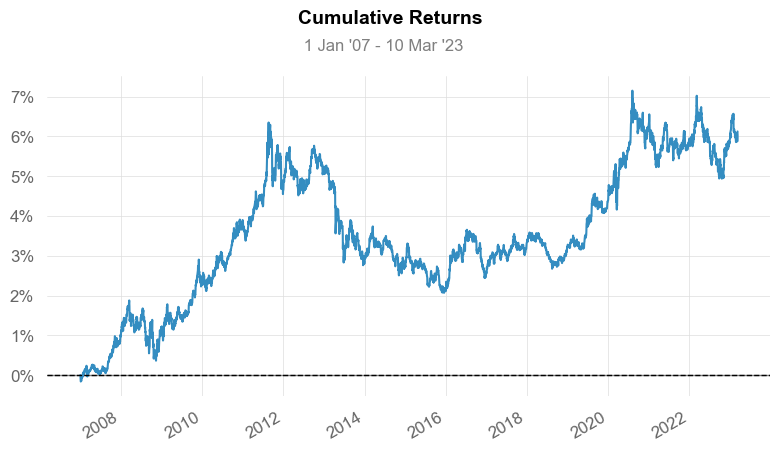

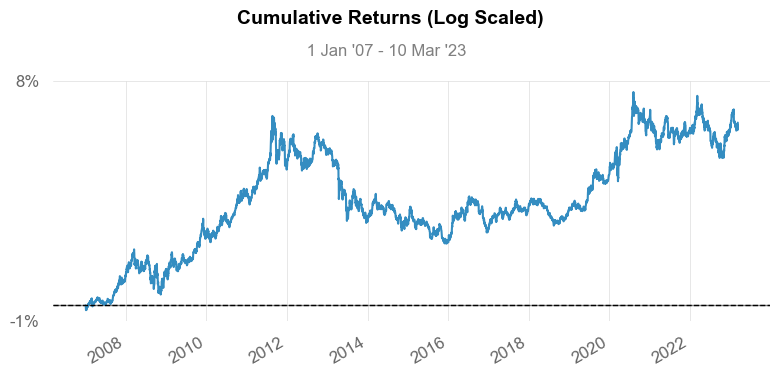

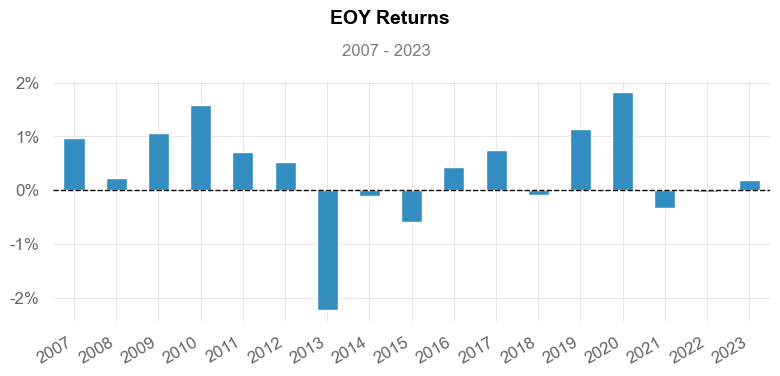

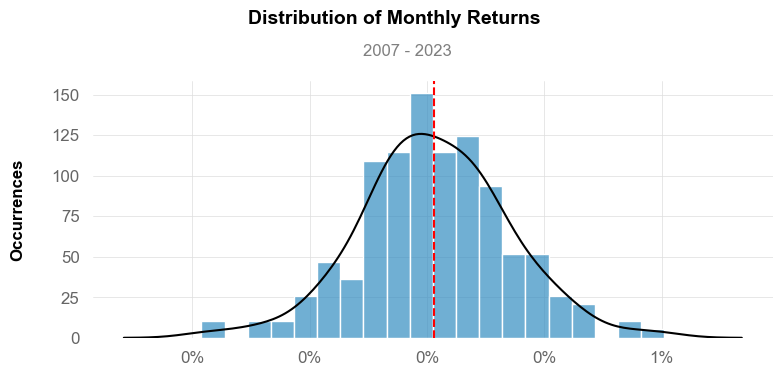

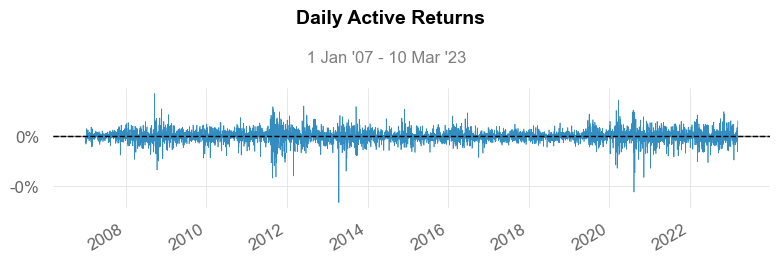

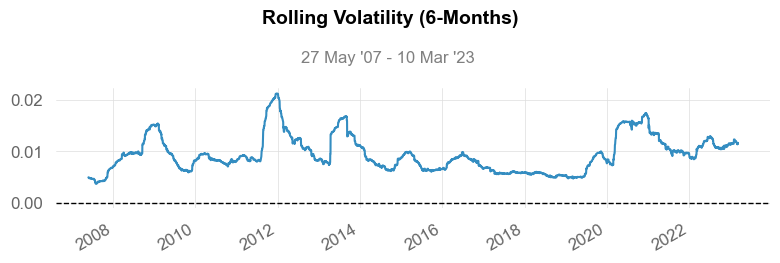

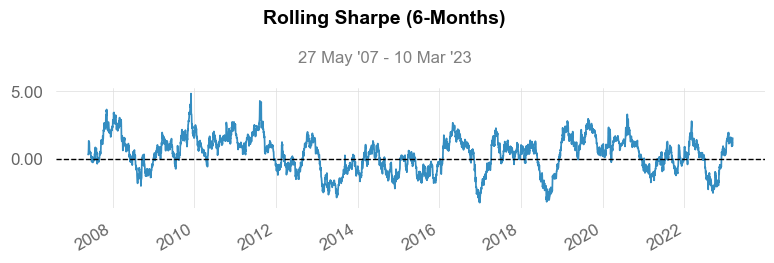

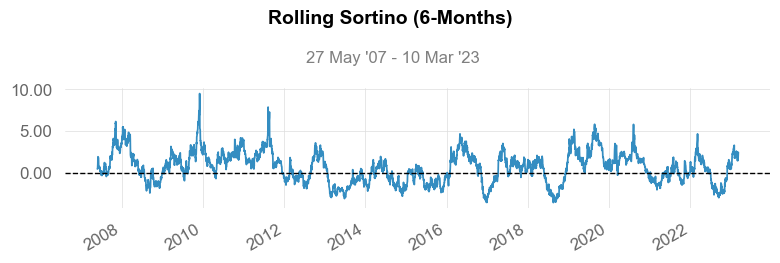

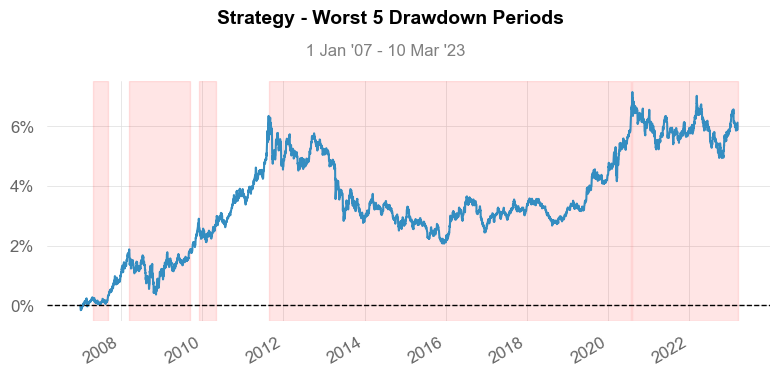

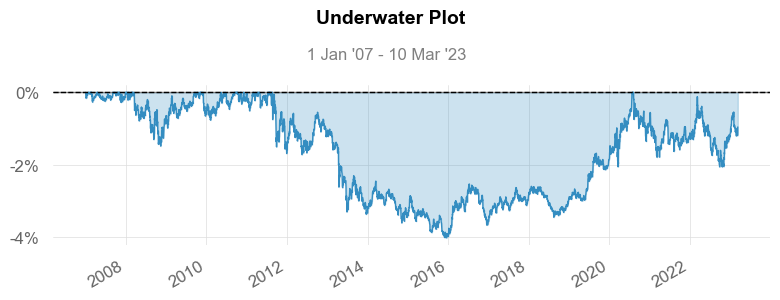

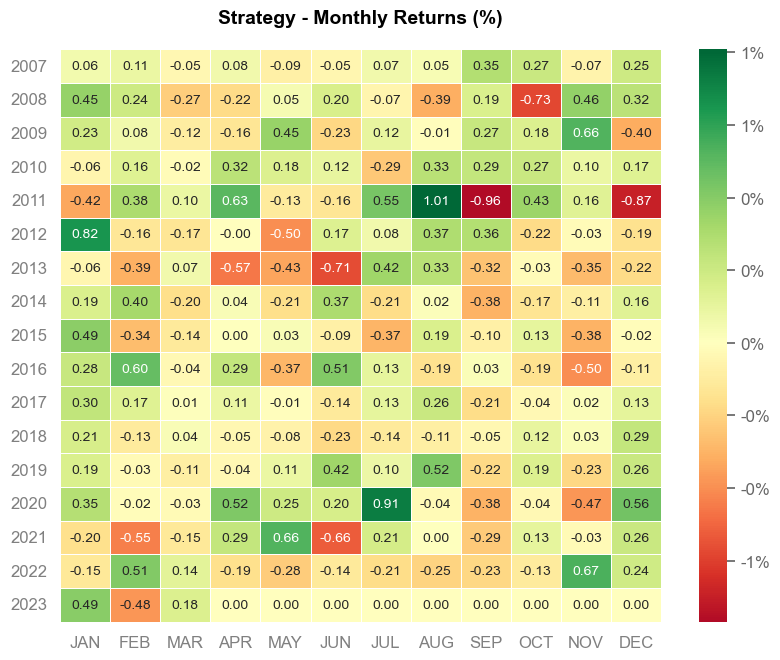

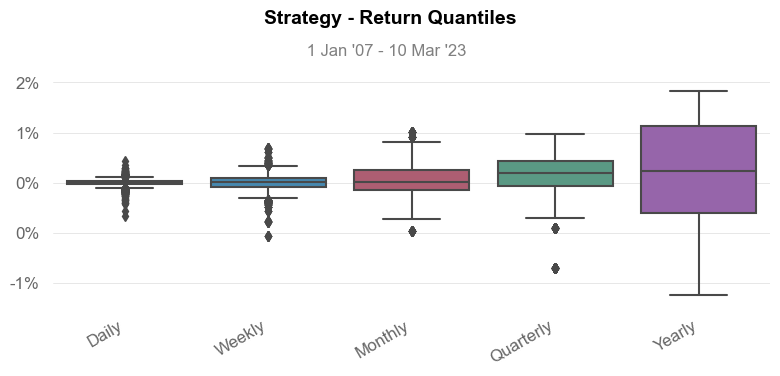

In [24]:
equity_curve = result_D1['_equity_curve']
equity_df = pd.DataFrame(equity_curve, columns=['Equity'])
equity_df['returns'] = equity_df['Equity'].pct_change().fillna(0)
qs.reports.full(equity_df['returns'])

In [25]:
qs.reports.html(equity_df['returns'])

## TF H4

In [10]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/2000, )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                   99.992301
Equity Final [$]                    21228.318
Equity Peak [$]                     21433.398
Return [%]                            6.14159
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                    0.298245
Volatility (Ann.) [%]                1.001725
Sharpe Ratio                         0.297731
Sortino Ratio                          0.4074
Calmar Ratio                         0.073895
Max. Drawdown [%]                   -4.036074
Avg. Drawdown [%]                   -0.105766
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       31 days 19:00:00
# Trades                                25974
Win Rate [%]                        50.950951
Best Trade [%]                       6.728522
Worst Trade [%]                     -5.296936
Avg. Trade [%]                    

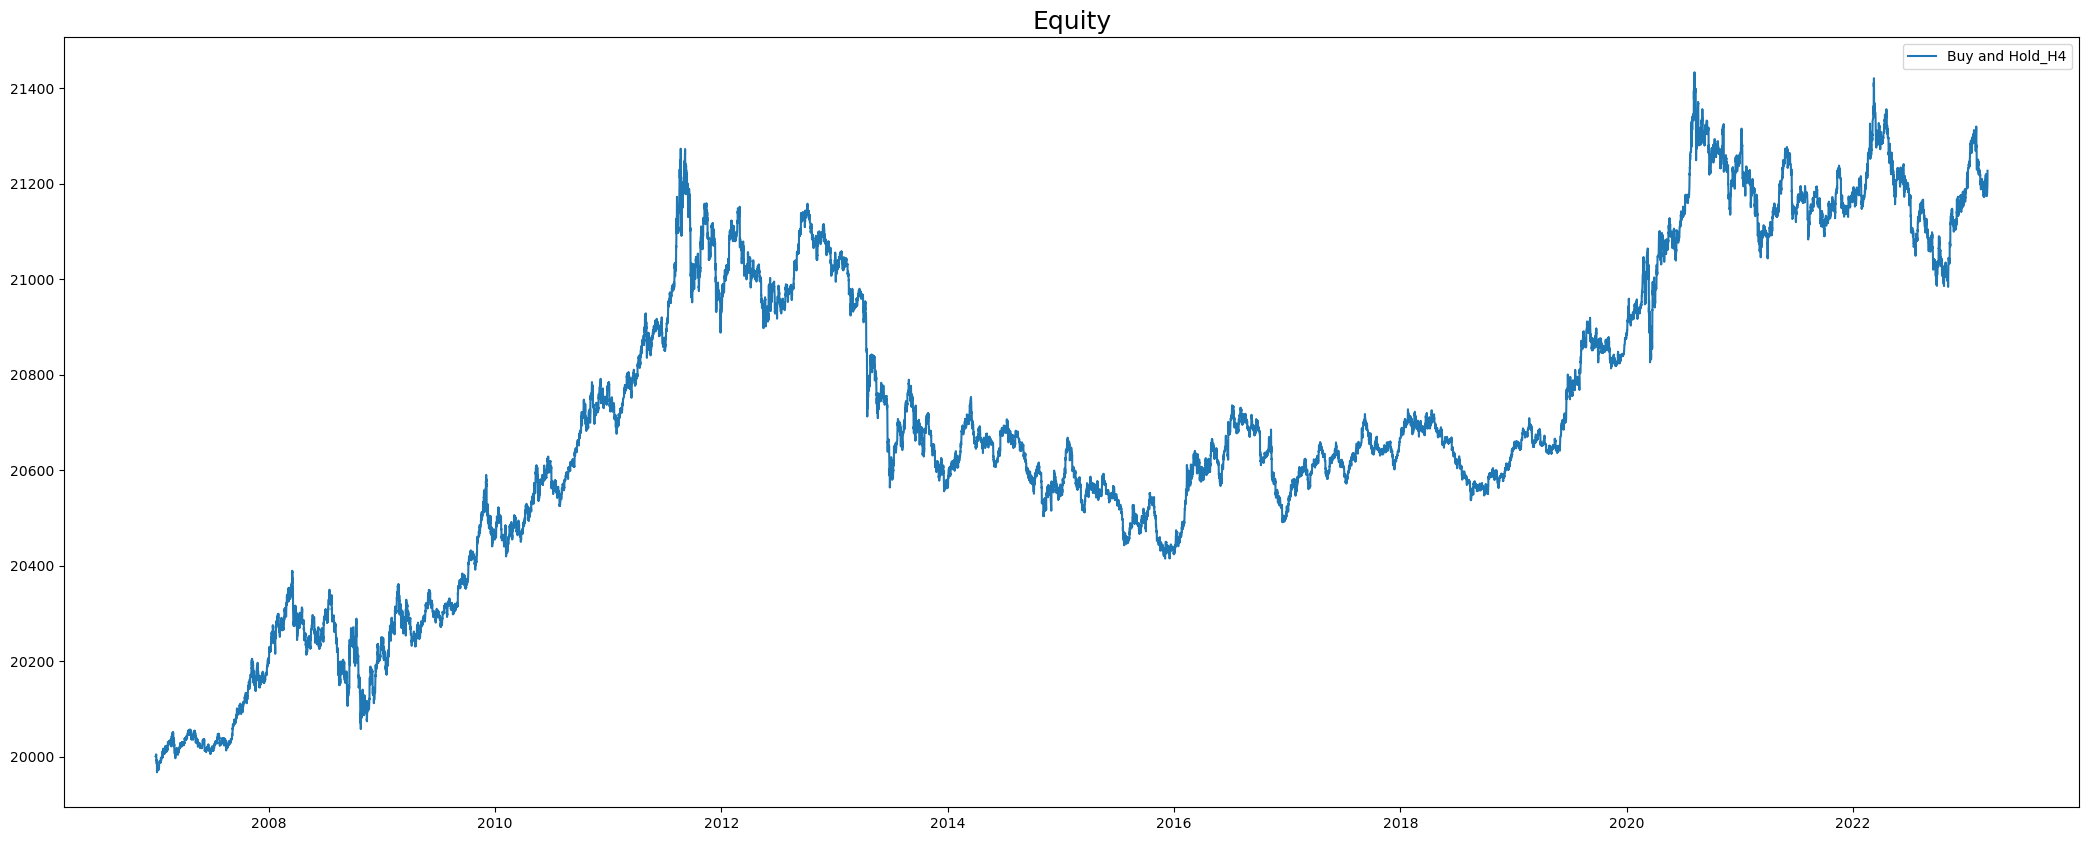

In [11]:
plot_equity_trades(result_H4['_trades'], 'Buy and Hold_H4', account_size)

## TF H1

In [12]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size, margin=1/2000, )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                   99.997958
Equity Final [$]                    21228.723
Equity Peak [$]                     21434.753
Return [%]                           6.143615
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                    0.298239
Volatility (Ann.) [%]                1.001706
Sharpe Ratio                         0.297731
Sortino Ratio                          0.4074
Calmar Ratio                         0.073142
Max. Drawdown [%]                   -4.077559
Avg. Drawdown [%]                   -0.068785
Max. Drawdown Duration     3246 days 20:00:00
Avg. Drawdown Duration       16 days 20:00:00
# Trades                                97952
Win Rate [%]                        50.554353
Best Trade [%]                       4.084206
Worst Trade [%]                     -5.291216
Avg. Trade [%]                    

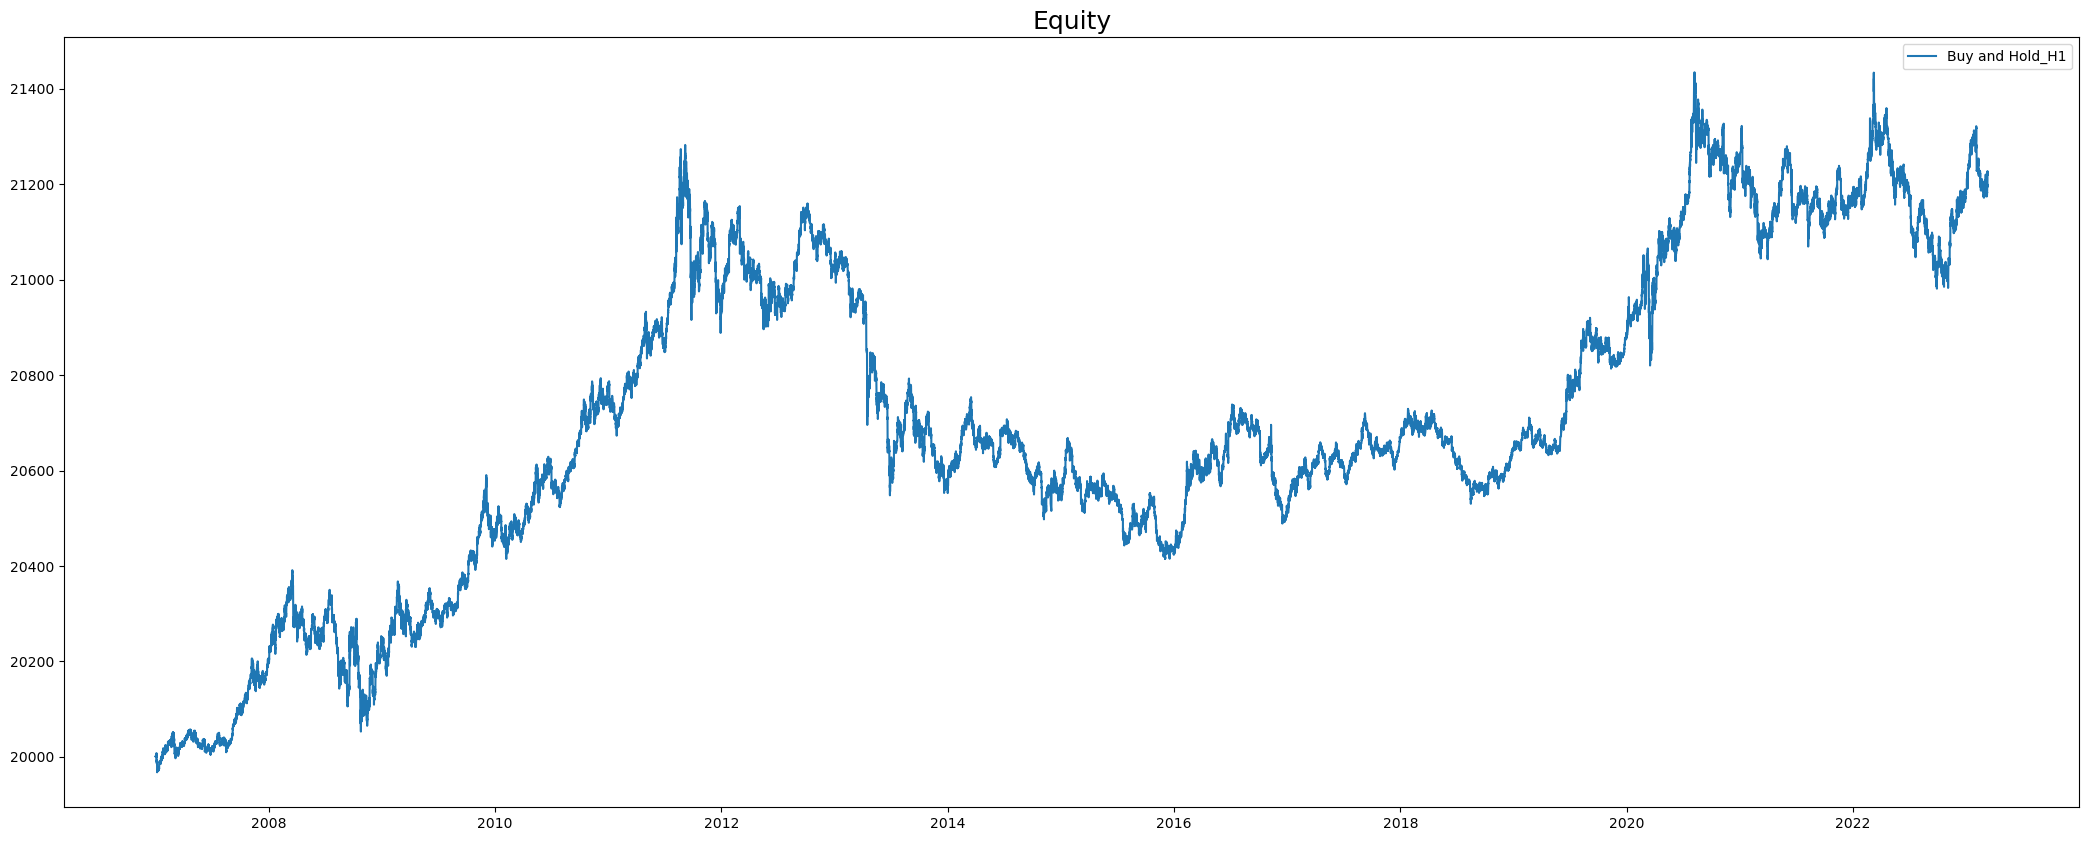

In [13]:
plot_equity_trades(result_H1['_trades'], 'Buy and Hold_H1', account_size)

## TF M30 

In [14]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/2000, )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                   99.998976
Equity Final [$]                    21228.314
Equity Peak [$]                     21434.344
Return [%]                            6.14157
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                    0.298245
Volatility (Ann.) [%]                1.001725
Sharpe Ratio                         0.297731
Sortino Ratio                          0.4074
Calmar Ratio                         0.072747
Max. Drawdown [%]                    -4.09974
Avg. Drawdown [%]                   -0.056072
Max. Drawdown Duration     3246 days 19:30:00
Avg. Drawdown Duration       12 days 16:42:00
# Trades                               195235
Win Rate [%]                        50.237918
Best Trade [%]                       3.048752
Worst Trade [%]                     -3.666351
Avg. Trade [%]                    

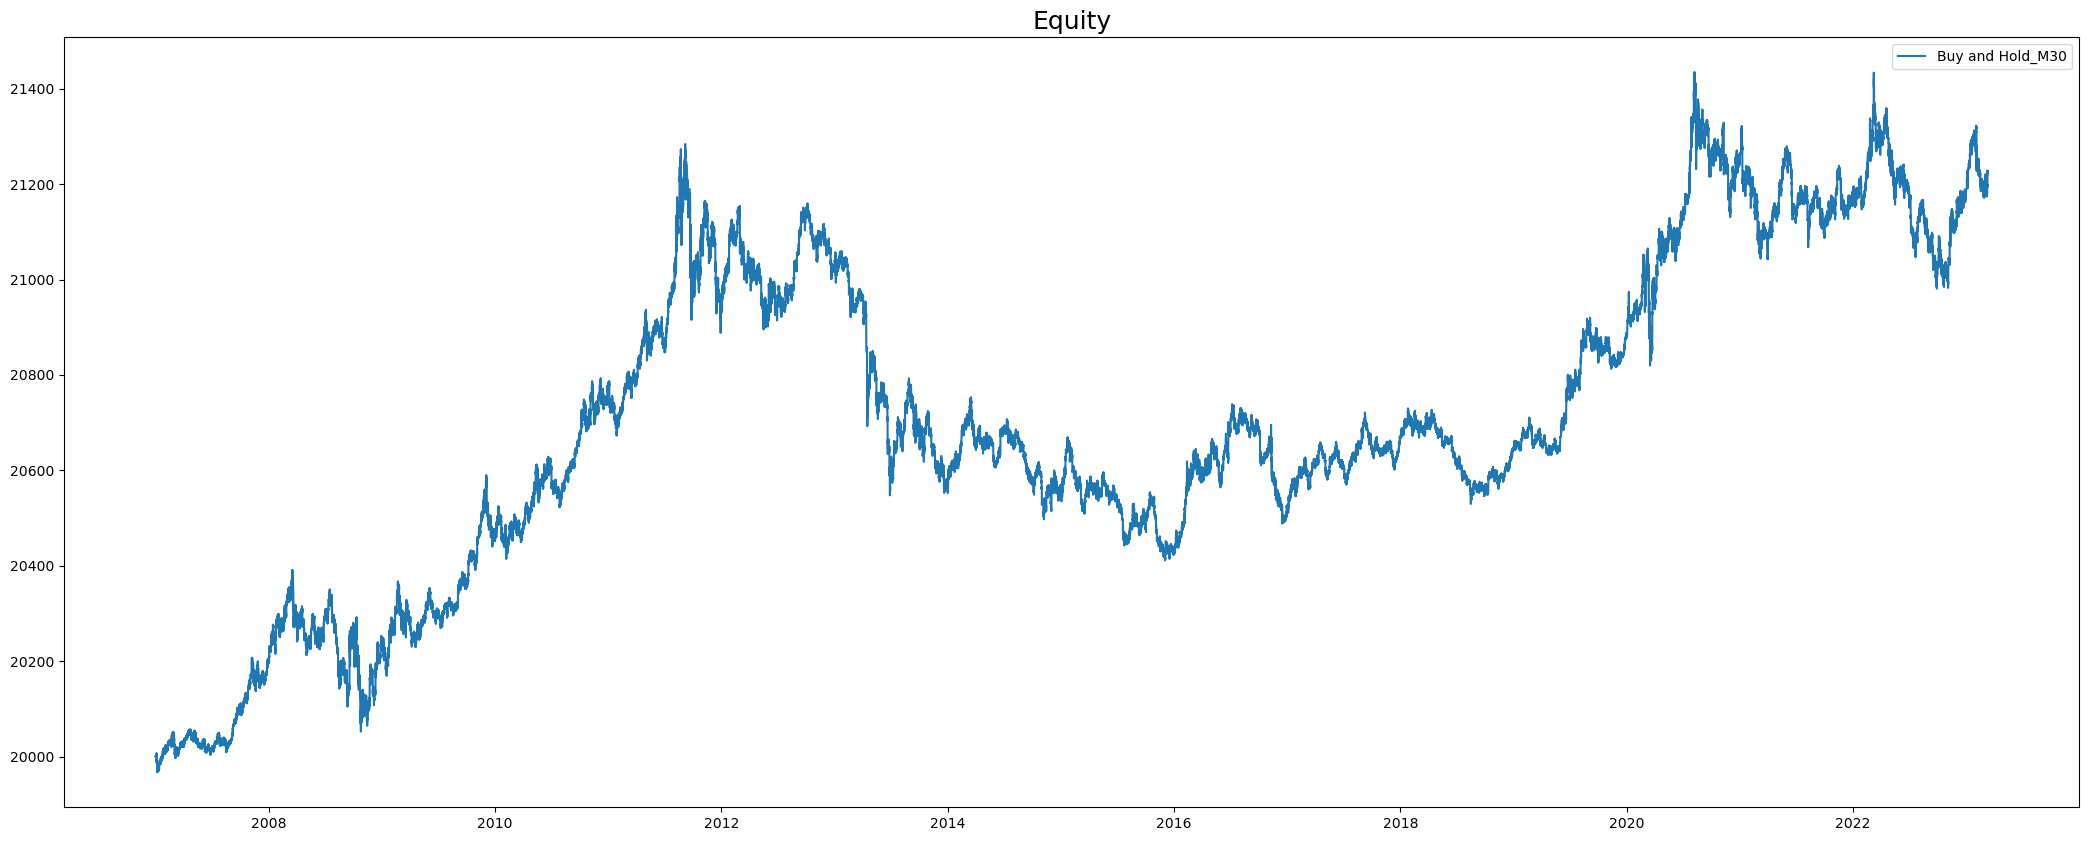

In [15]:
plot_equity_trades(result_M30['_trades'], 'Buy and Hold_M30', account_size)

## TF M15 

In [16]:
Backtest_M15 = Backtest(XAUUSD['M15'], strategy,
                       cash=account_size, margin=1/2000, )
result_M15 = Backtest_M15.run()
result_M15

Start                     2014-09-23 13:00:00
End                       2023-03-10 17:45:00
Duration                   3090 days 04:45:00
Exposure Time [%]                      99.999
Equity Final [$]                    20637.324
Equity Peak [$]                     20843.354
Return [%]                            3.18662
Buy & Hold Return [%]               52.062773
Return (Ann.) [%]                     0.30326
Volatility (Ann.) [%]                 0.97758
Sharpe Ratio                         0.310215
Sortino Ratio                        0.433203
Calmar Ratio                         0.139364
Max. Drawdown [%]                   -2.176022
Avg. Drawdown [%]                   -0.068571
Max. Drawdown Duration     1078 days 14:45:00
Avg. Drawdown Duration       13 days 06:04:00
# Trades                               199998
Win Rate [%]                        49.927499
Best Trade [%]                        2.51019
Worst Trade [%]                     -2.780288
Avg. Trade [%]                    

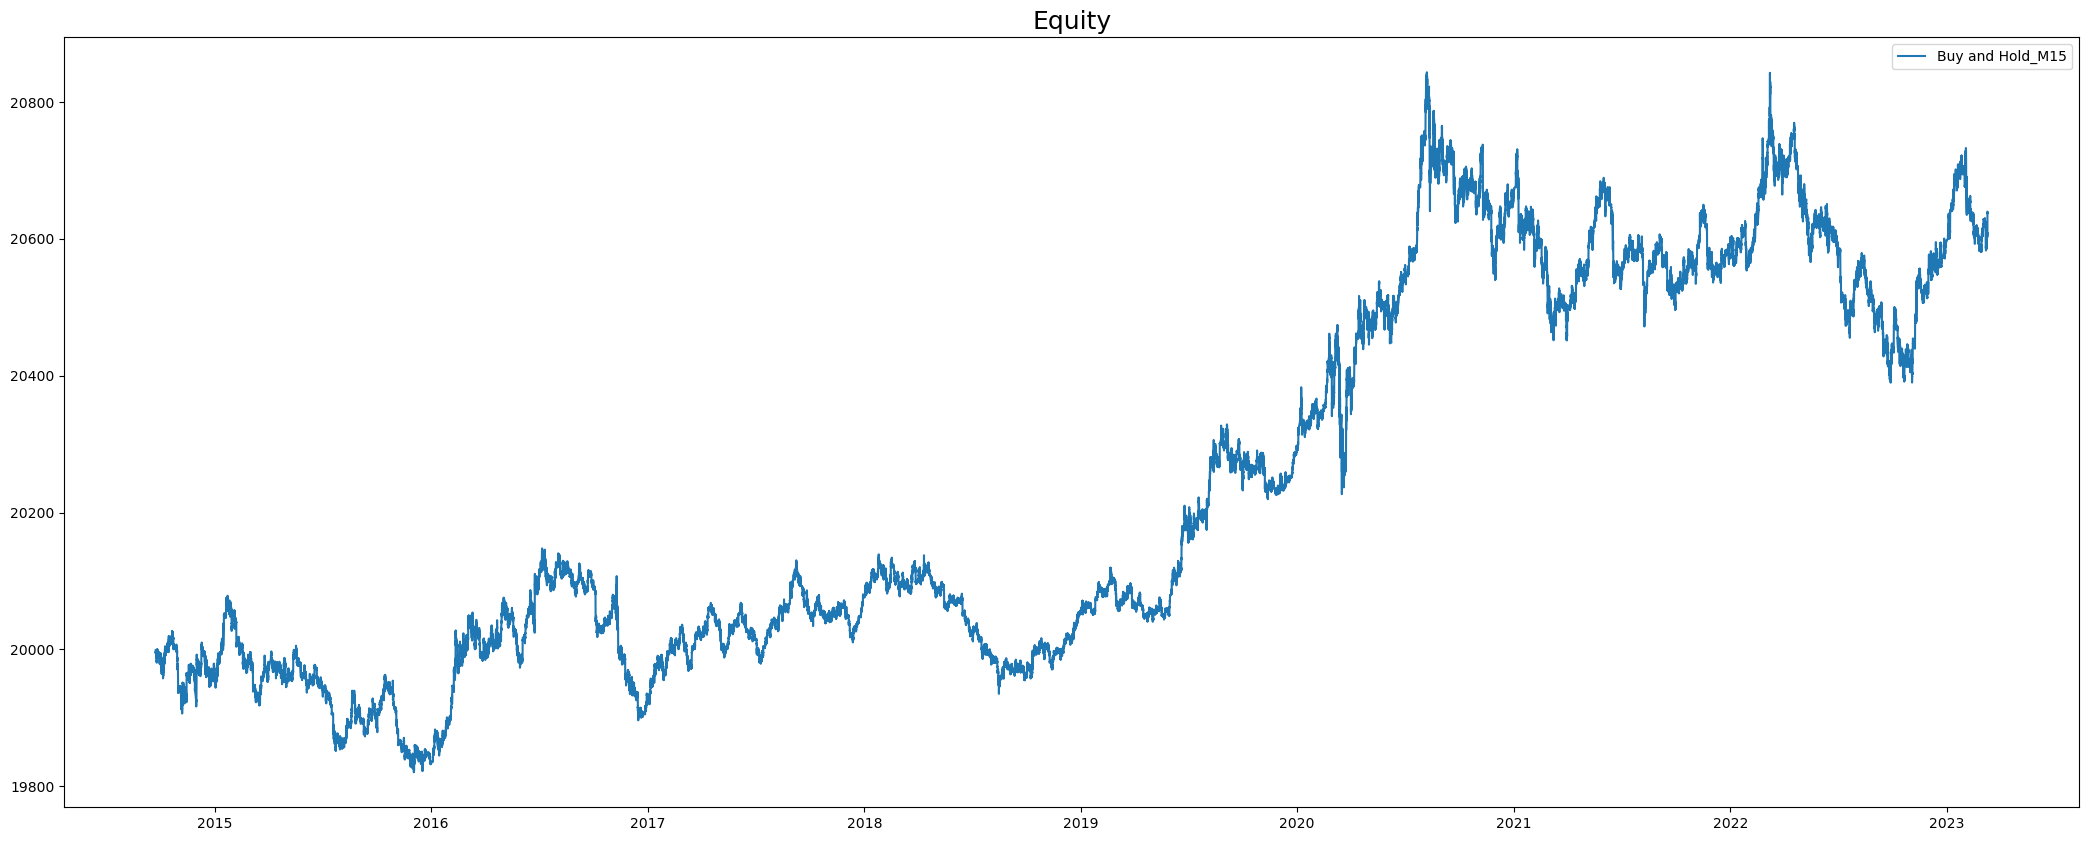

In [17]:
plot_equity_trades(result_M15['_trades'], 'Buy and Hold_M15', account_size)

## TF M5

In [18]:
Backtest_M5 = Backtest(XAUUSD['M5'], strategy,
                       cash=account_size, margin=1/2000, )
result_M5 = Backtest_M5.run()
result_M5

Start                     2020-05-15 11:10:00
End                       2023-03-10 17:55:00
Duration                   1029 days 06:45:00
Exposure Time [%]                      99.999
Equity Final [$]                     20130.57
Equity Peak [$]                     20337.787
Return [%]                            0.65285
Buy & Hold Return [%]                7.487395
Return (Ann.) [%]                    0.175702
Volatility (Ann.) [%]                 1.26146
Sharpe Ratio                         0.139284
Sortino Ratio                        0.185282
Calmar Ratio                         0.078435
Max. Drawdown [%]                   -2.240101
Avg. Drawdown [%]                   -0.041823
Max. Drawdown Duration      945 days 19:05:00
Avg. Drawdown Duration        7 days 03:28:00
# Trades                               199998
Win Rate [%]                        49.856999
Best Trade [%]                       1.649199
Worst Trade [%]                     -1.210154
Avg. Trade [%]                    

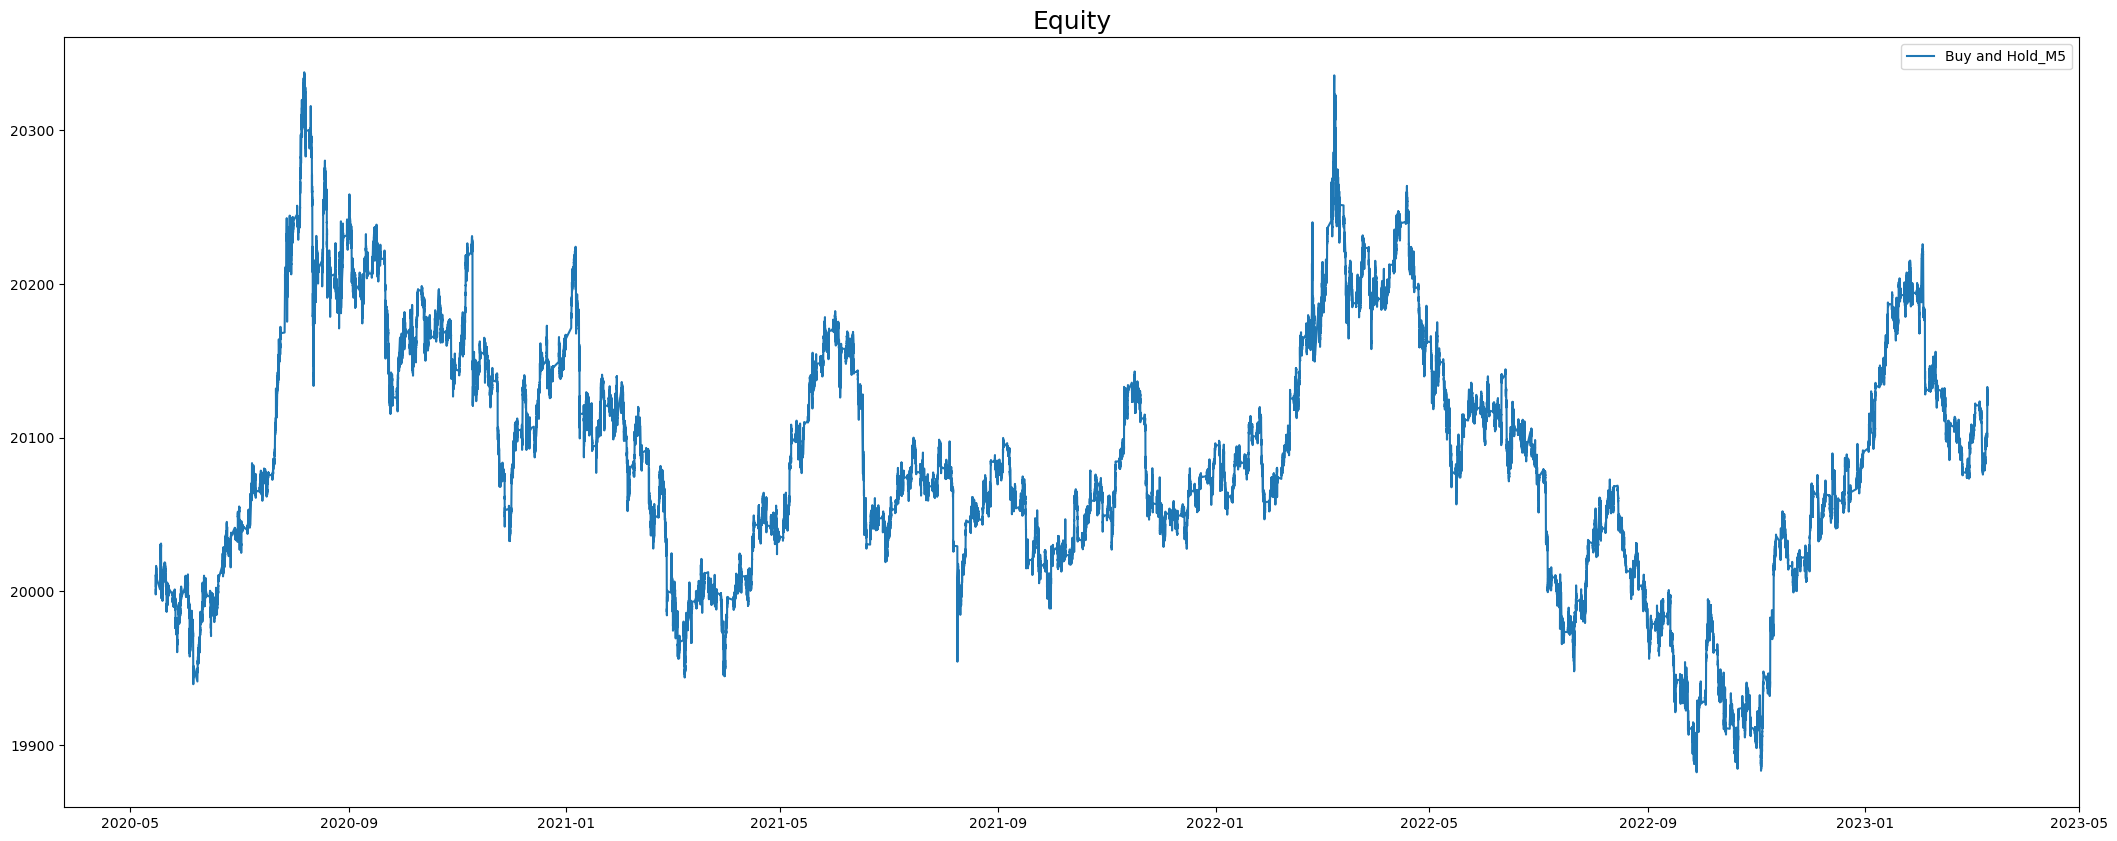

In [20]:
plot_equity_trades(result_M5['_trades'], 'Buy and Hold_M5', account_size)

## TF M1

In [21]:
Backtest_M1 = Backtest(XAUUSD['M1'], strategy,
                       cash=account_size, margin=1/2000, )
result_M1 = Backtest_M1.run()
result_M1

Start                     2022-08-16 23:13:00
End                       2023-03-10 17:59:00
Duration                    205 days 18:46:00
Exposure Time [%]                      99.999
Equity Final [$]                     20088.41
Equity Peak [$]                     20183.767
Return [%]                            0.44205
Buy & Hold Return [%]                4.977319
Return (Ann.) [%]                     0.63498
Volatility (Ann.) [%]                1.208834
Sharpe Ratio                         0.525283
Sortino Ratio                        0.792353
Calmar Ratio                         0.760464
Max. Drawdown [%]                    -0.83499
Avg. Drawdown [%]                   -0.023676
Max. Drawdown Duration       90 days 01:47:00
Avg. Drawdown Duration        0 days 22:39:00
# Trades                               199998
Win Rate [%]                        48.906489
Best Trade [%]                        1.29732
Worst Trade [%]                     -0.847262
Avg. Trade [%]                    

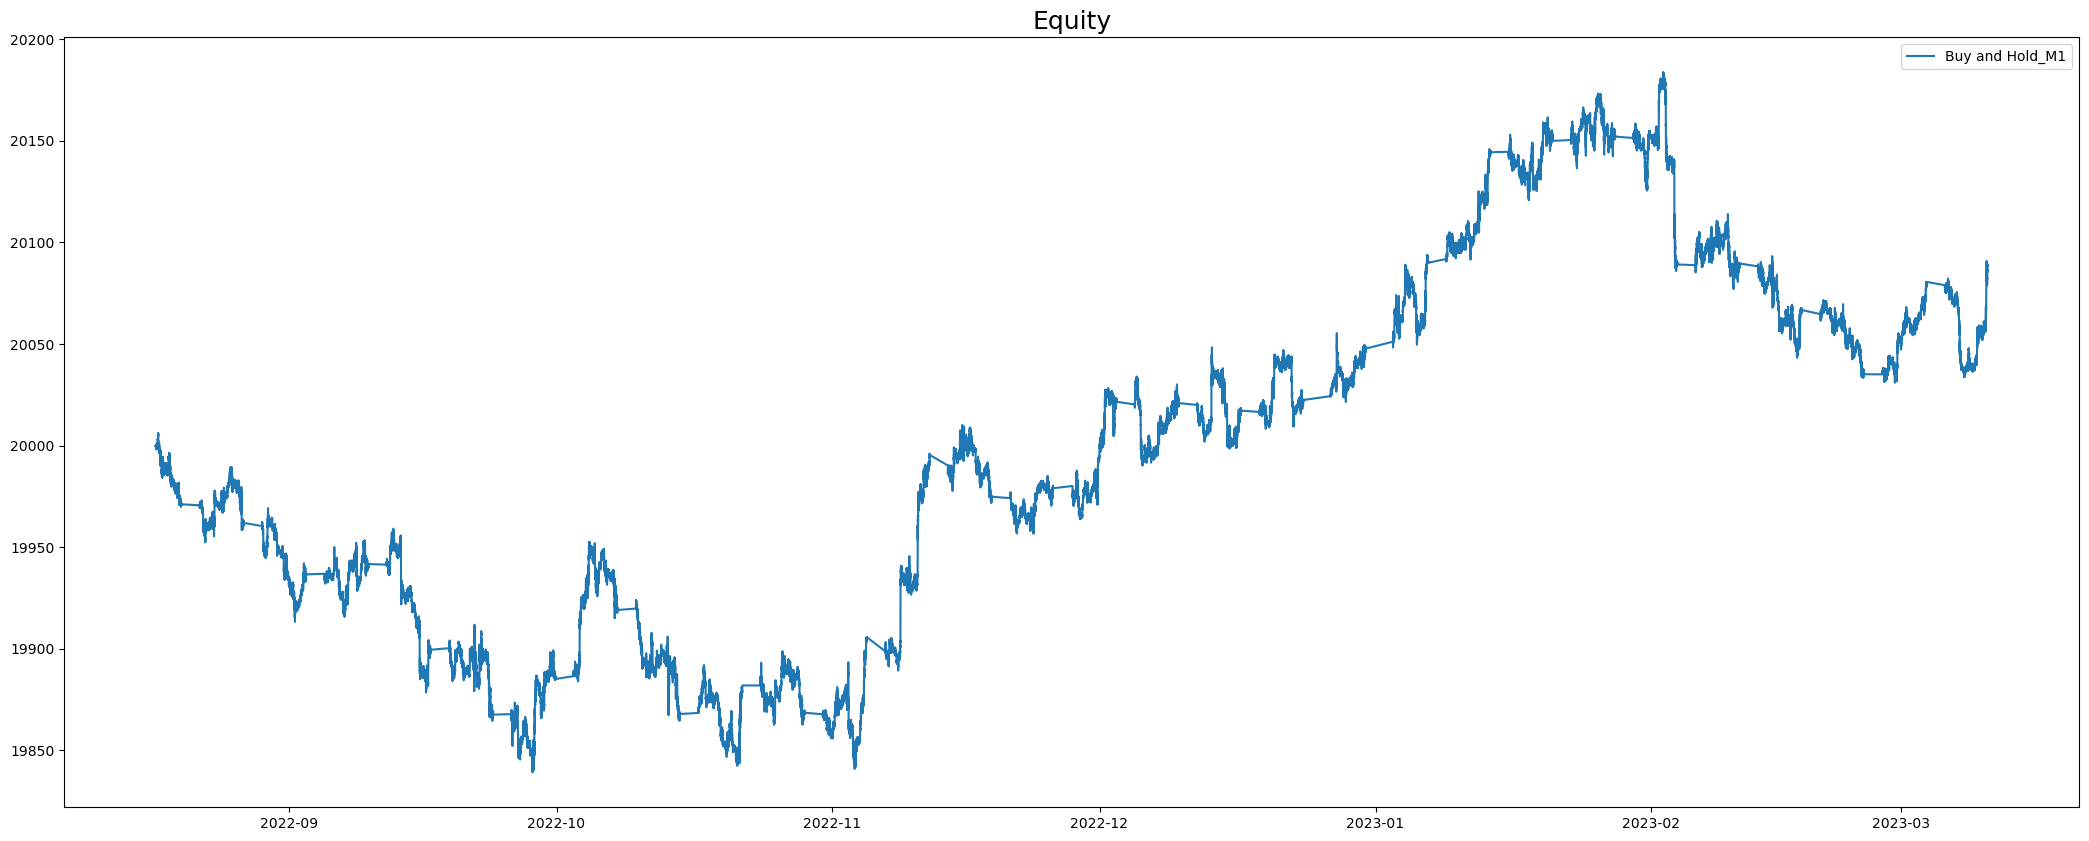

In [22]:
plot_equity_trades(result_M1['_trades'], 'Buy and Hold_M1', account_size)